# Retail Dataset - Initial Data Exploration

Starting exploration of the large retail dataset for regression task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset - this might take a moment due to size
df = pd.read_csv(r'C:\Users\nicol\retail_task\data\Retail.csv')
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (800000, 77)
Memory usage: 1905.75 MB


In [ ]:
# Basic info about the dataset
print("Dataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        800000 non-null  int64  
 1   gender                     800000 non-null  object 
 2   income_bracket             800000 non-null  object 
 3   loyalty_program            800000 non-null  object 
 4   membership_years           800000 non-null  int64  
 5   churned                    800000 non-null  object 
 6   marital_status             800000 non-null  object 
 7   number_of_children         800000 non-null  int64  
 8   education_level            800000 non-null  object 
 9   occupation                 800000 non-null  object 
 10  transaction_id             800000 non-null  int64  
 11  transaction_date           800000 non-null  object 
 12  product_id                 800000 non-null  int64  
 13  product_categor

,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,41,Female,Medium,No,3,No,Married,0,Bachelor's,Employed,...,72.83,No,Summer,No,18,No,Medium,2,Medium,6
1,40,Female,High,Yes,4,Yes,Single,4,PhD,Employed,...,44.60,Yes,Fall,No,16,Yes,Low,17,Medium,137
2,48,Male,High,No,4,Yes,Married,3,Bachelor's,Unemployed,...,46.15,Yes,Winter,Yes,11,Yes,High,68,High,275
3,19,Male,Low,No,9,Yes,Divorced,3,Bachelor's,Retired,...,0.62,No,Fall,No,15,Yes,Medium,61,Low,182
4,53,Female,Low,Yes,8,No,Divorced,2,Master's,Employed,...,38.09,Yes,Fall,Yes,0,Yes,High,19,High,330


In [7]:
#check for missing values
#Number of missing values in each column of dataset
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Series([], dtype: int64)


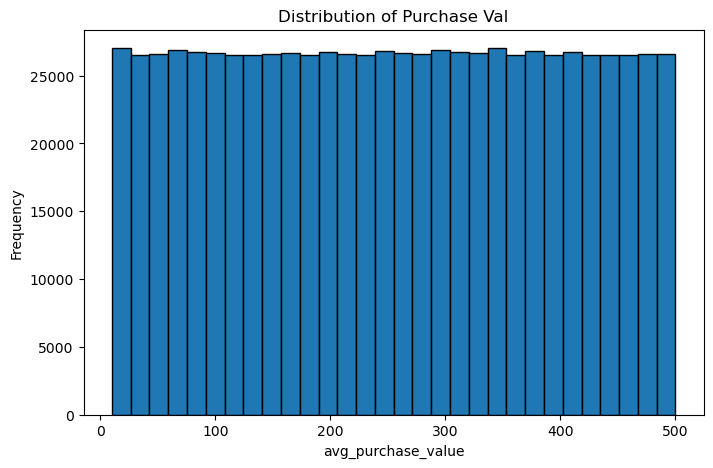

In [ ]:
#check avg purchase val distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["avg_purchase_value"], bins=30, edgecolor='k')
plt.title("Distribution of Purchase Val")
plt.xlabel("avg_purchase_value")
plt.ylabel("Frequency")
plt.show()


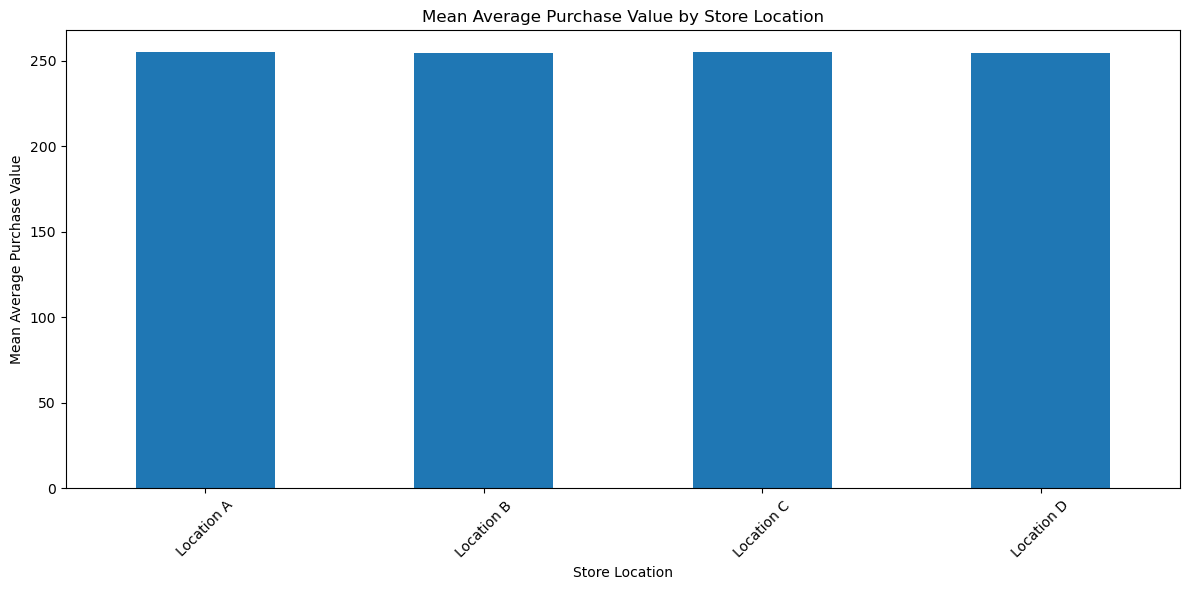

In [16]:
#Show distribution of purchase values per location
plt.figure(figsize=(12, 6))
avg_by_location = df.groupby('store_location')['avg_purchase_value'].mean()
avg_by_location.plot(kind='bar')
plt.title('Mean Average Purchase Value by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Mean Average Purchase Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

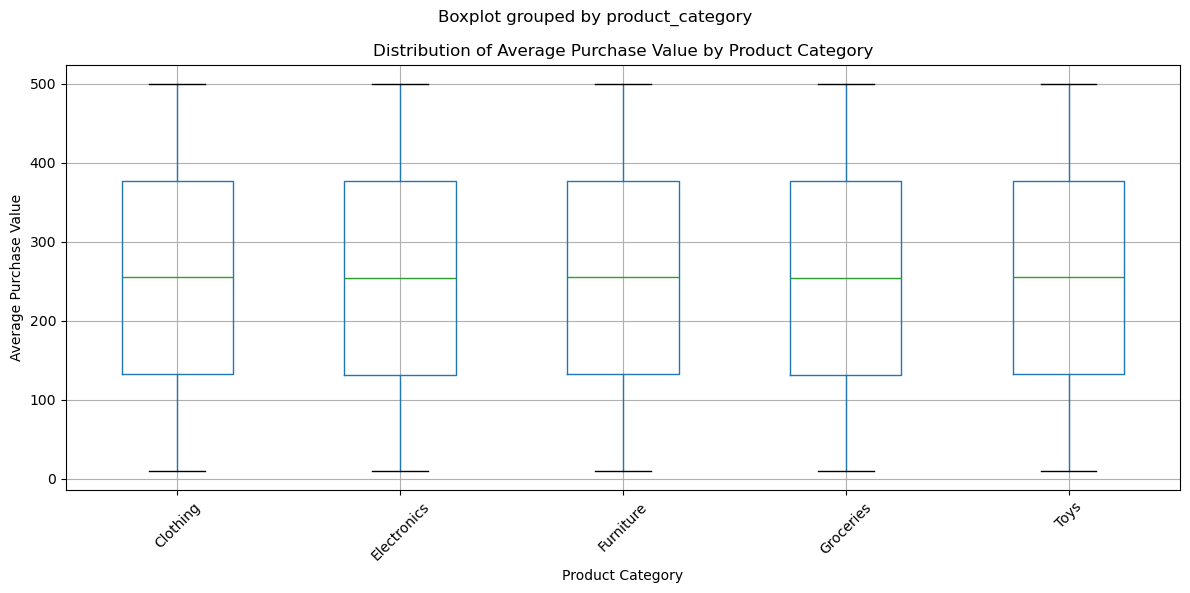

In [17]:
plt.figure(figsize=(12, 6))
df.boxplot(column='avg_purchase_value', by='product_category', ax=plt.gca())
plt.title('Distribution of Average Purchase Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
#Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Detected categorical columns: {len(categorical_cols)}")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col:20s}: {unique_count:4d} unique values")
    
print(f"\nNumerical columns: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col:20s}: range {df[col].min():.1f} - {df[col].max():.1f}")
    




Detected categorical columns: 38
  - gender              :    3 unique values
  - income_bracket      :    3 unique values
  - loyalty_program     :    2 unique values
  - churned             :    2 unique values
  - marital_status      :    3 unique values
  - education_level     :    4 unique values
  - occupation          :    4 unique values
  - transaction_date    : 795027 unique values
  - product_category    :    5 unique values
  - payment_method      :    4 unique values
  - store_location      :    4 unique values
  - day_of_week         :    7 unique values
  - purchase_frequency  :    4 unique values
  - last_purchase_date  : 789895 unique values
  - preferred_store     :    4 unique values
  - product_name        :    4 unique values
  - product_brand       :    3 unique values
  - product_size        :    3 unique values
  - product_color       :    5 unique values
  - product_material    :    4 unique values
  - product_manufacture_date: 794914 unique values
  - product_

In [21]:
#Get the unique categorical variables 

# Basic statistics
total_count = len(df)
print(f"Total entries: {total_count}")

for col in categorical_cols:
    # Basic statistics
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    
    print(f"Unique values: {unique_count}")
    print(f"Missing values: {missing_count} ({missing_count/total_count*100:.1f}%)")
    
    # Value counts
    value_counts = df[col].value_counts()
    print(f"\n=== TOP 10 MOST FREQUENT VALUES ===")
    print(value_counts.head(15))
    
    

Total entries: 800000
Unique values: 3
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
gender
Female    267136
Other     267045
Male      265819
Name: count, dtype: int64
Unique values: 3
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
income_bracket
High      266955
Medium    266868
Low       266177
Name: count, dtype: int64
Unique values: 2
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
loyalty_program
No     400461
Yes    399539
Name: count, dtype: int64
Unique values: 2
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
churned
No     400404
Yes    399596
Name: count, dtype: int64
Unique values: 3
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
marital_status
Divorced    267009
Married     266604
Single      266387
Name: count, dtype: int64
Unique values: 4
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
education_level
Bachelor's     200528
PhD            200016
High School    199908
Master's       1

In [23]:
#Explore Categorical Variables corelation with avg_purchase_value
target = 'avg_purchase_value'

for col in categorical_cols:
# Group statistics
    grouped_stats = df.groupby(col)['avg_purchase_value'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)

 # Sort by mean price
    grouped_stats = grouped_stats.sort_values('mean', ascending=False)
    
    print("-PURCHASE VALUE STATISTICS BY CATEGORY ")
    print(grouped_stats.head(10))
    
# Visualizations
plt.figure(figsize=(20, 12))

-PURCHASE VALUE STATISTICS BY CATEGORY 
         count    mean  median     std   min    max
gender                                             
Male    265819  255.33  255.76  141.58  10.0  500.0
Female  267136  254.70  254.70  141.49  10.0  500.0
Other   267045  254.56  254.58  141.27  10.0  500.0
-PURCHASE VALUE STATISTICS BY CATEGORY 
                 count    mean  median     std   min    max
income_bracket                                             
Medium          266868  255.00  255.31  141.40  10.0  500.0
Low             266177  254.85  255.00  141.42  10.0  500.0
High            266955  254.74  254.70  141.52  10.0  500.0
-PURCHASE VALUE STATISTICS BY CATEGORY 
                  count    mean  median     std   min    max
loyalty_program                                             
No               400461  255.10  255.11  141.57  10.0  500.0
Yes              399539  254.63  254.88  141.32  10.0  500.0
-PURCHASE VALUE STATISTICS BY CATEGORY 
          count    mean  median     

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [24]:
#compare multiple categorical columns in relation with avg_purchase_value

comparison_data = {}
    
for col in categorical_cols:
    if col in df.columns:
        clean_data = df[[col, 'avg_purchase_value']].dropna()
        grouped = clean_data.groupby(col)[target].mean()
            
        comparison_data[col] = {
                'unique_values': df[col].nunique(),
                'value_variance': grouped.var(),
                'value_range': grouped.max() - grouped.min(),
                'max_valu_category': grouped.idxmax(),
                'min_value_category': grouped.idxmin(),
                'correlation_strength': grouped.std() / grouped.mean() if grouped.mean() > 0 else 0
            }
# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data).T
comparison_df = comparison_df.sort_values('value_variance', ascending=False)
    
print("-CATEGORICAL COLUMNS COMPARISON")
#print(comparison_df.round(2))  
comparison_df.head()


-CATEGORICAL COLUMNS COMPARISON


,unique_values,value_variance,value_range,max_valu_category,min_value_category,correlation_strength
transaction_date,795027,19944.407722,490.0,2020-01-04 15:04:22,2020-02-27 17:54:38,0.554134
product_expiry_date,794875,19942.156926,490.0,2022-01-18 01:47:52,2022-10-06 07:27:24,0.554101
product_manufacture_date,794914,19941.789119,490.0,2018-01-30 15:29:24,2018-01-16 17:29:29,0.554049
promotion_end_date,789906,19882.216105,490.0,2022-02-09 08:13:56,2022-01-18 01:38:05,0.553247
promotion_start_date,789928,19881.764977,490.0,2021-01-06 21:11:07,2021-03-05 06:25:35,0.55322


In [25]:
# Compare multiple numerical columns in relation with target variable
comparison_data = {}
target= 'avg_purchase_value'

print(f"Analyzing correlation with target variable: '{target}'")

for col in numerical_cols:
    if col in df.columns and col != target:  # Don't correlate target with itself
        try:
            clean_data = df[[col, target]].dropna()
            
            if len(clean_data) > 1:  # Need at least 2 data points for correlation
                # Calculate correlation safely
                corr_value = clean_data[col].corr(clean_data[target])
                
                # Handle NaN correlations (e.g., when one variable is constant)
                if pd.isna(corr_value):
                    corr_value = 0.0
                
                comparison_data[col] = {
                    'unique_values': clean_data[col].nunique(),
                    'variance': clean_data[col].var(),
                    'range': clean_data[col].max() - clean_data[col].min(),
                    'mean': clean_data[col].mean(),
                    'std': clean_data[col].std(),
                    'correlation': corr_value,
                    'abs_correlation': abs(corr_value)
                }
            else:
                print(f"Warning: Not enough data for column '{col}' (only {len(clean_data)} valid pairs)")
                
        except Exception as e:
            print(f"Error processing column '{col}': {str(e)}")
            continue

# Create and display comparison DataFrame
if comparison_data:
    comparison_df = pd.DataFrame(comparison_data).T
    comparison_df = comparison_df.sort_values('abs_correlation', ascending=False)
    
    print("\nNUMERICAL COLUMNS COMPARISON")
    
    display(comparison_df.round(4))
    
else:
    print("No numerical data available for comparison")

Analyzing correlation with target variable: 'avg_purchase_value'

NUMERICAL COLUMNS COMPARISON


,unique_values,variance,range,mean,std,correlation,abs_correlation
customer_support_calls,20.0,3.319890e+01,19.00,9.4987,5.7619,-0.0027,0.0027
total_transactions,99.0,8.163270e+02,98.00,49.9962,28.5714,-0.0027,0.0027
total_returned_items,10.0,8.255500e+00,9.00,4.5002,2.8732,0.0025,0.0025
avg_discount_used,51.0,2.090000e-02,0.50,0.2500,0.1444,-0.0025,0.0025
in_store_purchases,100.0,8.340649e+02,99.00,49.5071,28.8802,0.0025,0.0025
product_rating,41.0,1.333300e+00,4.00,2.9994,1.1547,-0.0025,0.0025
distance_to_store,10001.0,8.331004e+02,100.00,50.0114,28.8635,-0.0024,0.0024
quantity,9.0,6.673900e+00,8.00,5.0034,2.5834,0.0023,0.0023
online_purchases,100.0,8.330464e+02,99.00,49.4303,28.8625,-0.0021,0.0021
product_return_rate,51.0,2.090000e-02,0.50,0.2501,0.1444,-0.0021,0.0021


## Initial Observations:
- Large dataset with 70+ features
- Target: avg_purchase_value per customer
- Need to understand customer, product, and transaction features

## TODO:
- Identify target variable location
- Check data types and missing values
- Understand feature categories
- Plan preprocessing strategy for large dataset